# TAXIFARE NOTEBOOK
#### We have to predict fare prices of taxi based on regression

### Importing the necessary modules and loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
ds=pd.read_csv("Taxifare.csv")
ds

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


## Exploring the dataset
##### We take some basic idea about the dataset i.e its shape, the datatypes of each columns, along with some useful statistics about each column of the dataset.


In [4]:
ds.describe()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
ds.date_time_of_pickup=pd.to_datetime(ds.date_time_of_pickup)
#we extract the days,time,month and year from the dataset and adding them as a separate column in the dataset.


In [7]:
ds["year"]=ds.date_time_of_pickup.dt.year
ds["month"]=ds.date_time_of_pickup.dt.month
ds["day"]=ds.date_time_of_pickup.dt.day
ds["time"]=ds.date_time_of_pickup.dt.time


In [8]:
ds

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17:26:21
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16:52:16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,00:35:00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,04:30:42
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,07:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23:25:15
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17:19:18
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,04:53:00
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,07:09:00


## Removing any errors from the data

In [9]:
ds[ds.amount<=0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,23:37:10
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,05:14:27
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1,2010,2,15,14:26:01
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,08:57:10
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1,2015,5,15,21:40:28
28839,39:10.0,-2.5,2013-08-11 13:39:10+00:00,-73.785260,40.648442,0.000000,0.000000,1,2013,8,11,13:39:10
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1,2015,4,30,15:19:45
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1,2015,3,9,10:29:46
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1,2010,3,18,19:13:39


In [10]:
ds[ds.no_of_passenger<=0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time
314,16:15.0,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0,2015,6,2,23:16:15
566,33:18.0,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0,2012,1,28,21:33:18
678,24:20.0,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0,2012,2,27,07:24:20
1160,58:48.0,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0,2011,5,25,23:58:48
1935,09:28.0,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0,2011,10,23,11:09:28
...,...,...,...,...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10+00:00,-73.988813,40.731228,-73.954773,40.733567,0,2012,4,3,22:57:10
47401,41:22.0,9.7,2012-03-08 12:41:22+00:00,-73.991375,40.732217,-73.976507,40.758900,0,2012,3,8,12:41:22
47920,45:00.0,5.3,2012-03-11 18:45:00+00:00,-73.966112,40.794478,-73.953933,40.787287,0,2012,3,11,18:45:00
48118,56:28.0,8.1,2011-03-25 19:56:28+00:00,-73.973382,40.743915,-73.948883,40.777647,0,2011,3,25,19:56:28


In [11]:
ds[ds.latitude_of_pickup>90]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time
5686,15:00.0,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,11:15:00


In [12]:
ds.drop(ds[ds.amount<=0].index,inplace=True)
ds.drop(ds[ds.no_of_passenger<=0].index,inplace=True)
ds.drop(ds[ds.latitude_of_pickup>90].index,inplace=True)

In [13]:
ds.shape

(49825, 12)

### Removing any outliers from the data

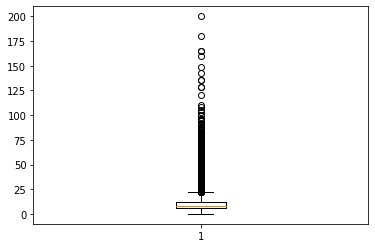

In [14]:
plt.boxplot(ds['amount']);   # original 'amount' dataset

In [15]:
q1=np.percentile(ds['amount'],25,method='midpoint')
q3=np.percentile(ds['amount'],75,method='midpoint')
iqr=q3-q1
print(ds.shape)
upper_bound=np.where(ds['amount']>=(q3+1.5*iqr))
lower_bound=np.where(ds['amount']<=(q1-1.5*iqr))
ds.drop(ds.index[upper_bound[0]],inplace=True)
ds.drop(ds.index[lower_bound[0]],inplace=True)
print(ds.shape)

(49825, 12)
(45469, 12)


{'whiskers': [<matplotlib.lines.Line2D at 0x2f0539734c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f053973a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f0539731f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f053982040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f053982310>],
 'means': []}

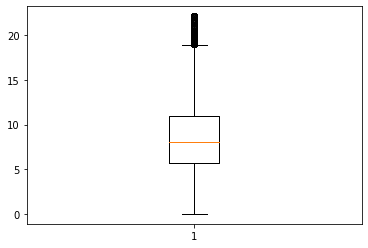

In [16]:
plt.boxplot(ds["amount"])  # 'amount' dataset after removing outliers 
    
    

{'whiskers': [<matplotlib.lines.Line2D at 0x2f0539d6520>,
 'caps': [<matplotlib.lines.Line2D at 0x2f0539d6ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f0539d6250>],
 'medians': [<matplotlib.lines.Line2D at 0x2f0539e20a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f0539e2370>],
 'means': []}

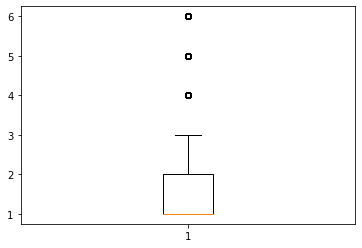

In [17]:
plt.boxplot(ds['no_of_passenger'])  # original 'no of passengers' count

In [18]:
q1=np.percentile(ds['no_of_passenger'],25,method='midpoint')
q3=np.percentile(ds['no_of_passenger'],75,method='midpoint')
iqr=q3-q1
print(ds.shape)
upper_bound=np.where(ds['no_of_passenger']>=(q3+1.5*iqr))
lower_bound=np.where(ds['no_of_passenger']<=(q1-1.5*iqr))
ds.drop(ds.index[upper_bound[0]],inplace=True)
ds.drop(ds.index[lower_bound[0]],inplace=True)
print(ds.shape)

(45469, 12)
(40505, 12)


{'whiskers': [<matplotlib.lines.Line2D at 0x2f053a35820>,
 'caps': [<matplotlib.lines.Line2D at 0x2f053a35dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f053a35550>],
 'medians': [<matplotlib.lines.Line2D at 0x2f0537923a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f053792670>],
 'means': []}

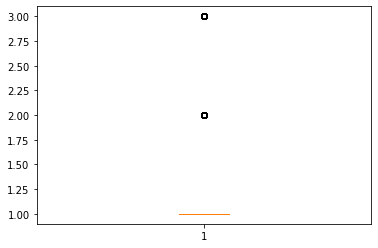

In [19]:
plt.boxplot(ds['no_of_passenger'])  # 'no of passenger' count after removing outliers

In [20]:
def distance(x):  # defining a function to calculate the distance between the pickup and dropoff coordinates

    lon_p=x[0]
    lat_p=x[1]
    lon_d=x[2]
    lat_d=x[3]
    np.radians(lon_p)
    np.radians(lat_p)
    np.radians(lon_d)
    np.radians(lat_d)
    
    dlon=lon_d-lon_p
    dlat=lat_d-lat_p
    s=np.sin(dlat/2)**2+np.cos(lat_p)*np.cos(lat_d)*np.sin(dlon/2)**2
    km=2*np.arcsin(np.sqrt(s))*6367
    return km

In [21]:

ds['distance']=ds[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(distance,axis=1)

In [22]:
ds

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time,distance
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17:26:21,60.040371
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16:52:16,506.922538
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,00:35:00,86.941594
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,04:30:42,161.320364
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,07:51:00,123.872153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23:25:15,291.234084
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17:19:18,51.231040
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,04:53:00,130.964636
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,07:09:00,48.850640


In [23]:
ds[ds['distance']==0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time,distance
11,24:00.0,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,11:24:00,0.0
15,57:00.0,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2013,11,23,12:57:00,0.0
26,01:00.0,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2011,2,7,20:01:00,0.0
124,22:00.0,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,17:22:00,0.0
191,55:58.0,6.5,2014-01-08 21:55:58+00:00,-73.998488,40.726303,-73.998488,40.726303,1,2014,1,8,21:55:58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49799,54:56.0,4.1,2010-01-19 15:54:56+00:00,-73.943283,40.746815,-73.943283,40.746815,2,2010,1,19,15:54:56,0.0
49816,54:00.0,4.9,2012-02-20 00:54:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2012,2,20,00:54:00,0.0
49845,57:15.0,6.6,2009-03-02 21:57:15+00:00,0.000000,0.000000,0.000000,0.000000,3,2009,3,2,21:57:15,0.0
49967,31:34.0,20.5,2014-06-09 21:31:34+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,6,9,21:31:34,0.0


In [24]:
ds.drop(ds[ds['distance']==0].index,inplace=True)
ds.shape

(39330, 13)

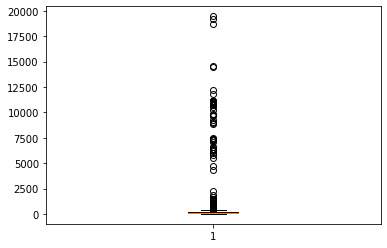

In [25]:
plt.boxplot(ds['distance']);  # checking for any outliers in the 'distance travelled' dataset

In [26]:
q1=np.percentile(ds['distance'],25,method='midpoint')
q3=np.percentile(ds['distance'],75,method='midpoint')
iqr=q3-q1
print(ds.shape)
upper_bound=np.where(ds['distance']>=(q3+1.5*iqr))
lower_bound=np.where(ds['distance']<=(q1-1.5*iqr))
ds.drop(ds.index[upper_bound[0]],inplace=True)
ds.drop(ds.index[lower_bound[0]],inplace=True)
print(ds.shape)

(39330, 13)
(37575, 13)


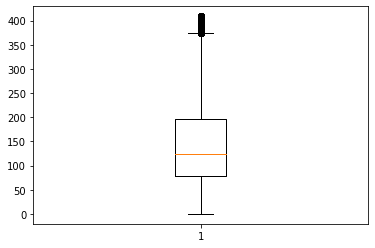

In [27]:
plt.boxplot(ds['distance']); # after removing outliers

In [28]:
ds.drop(['date_time_of_pickup','unique_id'],axis=1,inplace=True)

#### Here we have the refined datset ready to build a model on

In [29]:
ds

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,time,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17:26:21,60.040371
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,00:35:00,86.941594
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,04:30:42,161.320364
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,07:51:00,123.872153
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,09:50:45,245.645991
...,...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,2012,10,13,19:57:00,132.988481
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23:25:15,291.234084
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17:19:18,51.231040
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,04:53:00,130.964636


## Spliting the dataset into training and testing datasets

In [30]:
features=['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger','year','month','day','distance']


In [31]:
x=ds.loc[:,features]
y=ds.loc[:,['amount']]


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=33)

## Model training and evaluation
### Here we have taken 3 different models for training:
### 1) Linear Regression
### 2) Decision Tree Regressor
### 3) Random Forest Classifier

#### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
preds=model.predict(x_test)


In [36]:
model.score(x_train,y_train)

0.6719862190697119

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.6862862128182949

#### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
model_2=DecisionTreeRegressor(criterion='squared_error',max_depth=None,random_state=33)

In [39]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=33)

In [40]:
preds_2=model_2.predict(x_test)
model_2.score(x_train,y_train)

1.0

In [41]:
r2_score(y_test,preds_2)

0.413318151721759

#### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model_3=RandomForestRegressor(n_estimators=420)

In [44]:
model_3.fit(x_train,y_train.values.ravel())


RandomForestRegressor(n_estimators=420)

In [45]:
preds_3=model_3.predict(x_test)
model_3.score(x_train,y_train)

0.9599071776560938

In [46]:
r2_score(y_test,preds_3)

0.7173554762681817

In [47]:
from lightgbm import LGBMRegressor
model_4=LGBMRegressor()
model_4.fit(x_train,y_train)

LGBMRegressor()

In [48]:
preds_4=model_4.predict(x_test)
model_4.score(x_train,y_train)

0.7697058286203147

In [49]:
r2_score(y_test,preds_4)

0.7409359646503615

In [50]:
from sklearn.linear_model import SGDRegressor
model_5=SGDRegressor()

In [51]:
model_5.fit(x_train,y_train.values.ravel())

SGDRegressor()

In [52]:
preds_5=model_5.predict(x_test)
model_5.score(x_train,y_train)

-5.410503189448933e+28

In [53]:
r2_score(y_test,preds_5)

-5.156351604533524e+28

In [54]:
from sklearn.kernel_ridge import KernelRidge
model_6=KernelRidge()

In [55]:
model_6.fit(x_train,y_train)

KernelRidge()

In [56]:
preds_6=model_6.predict(x_test)
model_6.score(x_train,y_train)

0.6384727074274614

In [57]:
r2_score(y_test,preds_6)

0.6533318858707482

In [58]:
from sklearn.linear_model import ElasticNet
model_7=ElasticNet()

In [59]:
model_7.fit(x_train,y_train)

ElasticNet()

In [60]:
preds_7=model_7.predict(x_test)
model_7.score(x_train,y_train)

0.6602304177818823

In [61]:
r2_score(y_test,preds_7)

0.6745245803409206

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
model_8=GradientBoostingRegressor()

In [68]:
model_8.fit(x_train,y_train.values.ravel())

GradientBoostingRegressor()

In [71]:
preds_8=model_8.predict(x_test)
model_8.score(x_train,y_train)

0.720632676654048

In [72]:
r2_score(y_test,preds_8)

0.7189004844788248

In [74]:
from sklearn.svm import SVR
model_9=SVR(kernel='sigmoid')

In [76]:
model_9.fit(x_train,y_train.values.ravel())

SVR(kernel='sigmoid')

In [79]:
preds_9=model_9.predict(x_test)
model_9.score(x_train,y_train)

0.6111755563955035

In [81]:
r2_score(y_test,preds_9)

0.6251628929618123